In [2]:
import os
import pickle as pkl

import pandas as pd

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

In [3]:
counts = pd.read_csv('soybean_count_table.csv')
counts

,Geneid,Control_D1_R1,Control_D1_R2,Control_D1_R3,Control_D1_R4,Alternaria_D1_R1,Alternaria_D1_R2,Alternaria_D1_R3,Alternaria_D1_R4
0,LOC100808170,1,0,0,0,3,1,3,0
1,LOC102661143,2,4,3,0,1,0,2,0
2,LOC121174904,0,0,0,0,0,0,0,0
3,LOC106794262,0,0,0,0,0,0,0,0
4,LOC100781438,4,3,1,5,3,3,3,1
...,...,...,...,...,...,...,...,...,...
54527,I638_mgp007,0,0,0,0,0,0,0,0
54528,I638_mgp006,0,0,0,0,0,0,0,0
54529,I638_mgp005,0,0,0,0,0,0,0,0
54530,I638_mgp004,0,0,0,0,0,0,0,0


In [4]:
counts = counts.set_index('Geneid')
counts

,Control_D1_R1,Control_D1_R2,Control_D1_R3,Control_D1_R4,Alternaria_D1_R1,Alternaria_D1_R2,Alternaria_D1_R3,Alternaria_D1_R4
Geneid,,,,,,,,
LOC100808170,1,0,0,0,3,1,3,0
LOC102661143,2,4,3,0,1,0,2,0
LOC121174904,0,0,0,0,0,0,0,0
LOC106794262,0,0,0,0,0,0,0,0
LOC100781438,4,3,1,5,3,3,3,1
...,...,...,...,...,...,...,...,...
I638_mgp007,0,0,0,0,0,0,0,0
I638_mgp006,0,0,0,0,0,0,0,0
I638_mgp005,0,0,0,0,0,0,0,0


In [5]:
counts = counts[counts.sum(axis = 1) > 0]
counts

,Control_D1_R1,Control_D1_R2,Control_D1_R3,Control_D1_R4,Alternaria_D1_R1,Alternaria_D1_R2,Alternaria_D1_R3,Alternaria_D1_R4
Geneid,,,,,,,,
LOC100808170,1,0,0,0,3,1,3,0
LOC102661143,2,4,3,0,1,0,2,0
LOC100781438,4,3,1,5,3,3,3,1
LOC100788220,2,3,0,5,6,3,2,1
LOC100779643,3,5,3,9,16,3,4,1
...,...,...,...,...,...,...,...,...
I638_mgp018,0,1,0,4,0,1,3,1
I638_mgp014,0,0,0,0,0,0,1,0
I638_mgp009,1,1,0,1,0,2,0,0


In [6]:
counts = counts.T
counts

Geneid,LOC100808170,LOC102661143,LOC100781438,LOC100788220,LOC100779643,LOC100499919,LOC100792431,LOC100783065,LOC548054,LOC100795420,...,I638_mgr001,I638_mgp021,I638_mgp060,I638_mgp020,I638_mgp019,I638_mgp018,I638_mgp014,I638_mgp009,I638_mgp008,I638_mgp003
Control_D1_R1,1,2,4,2,3,9,5,0,37,2,...,53,1,0,1,1,0,0,1,0,0
Control_D1_R2,0,4,3,3,5,15,9,2,28,2,...,87,0,1,2,0,1,0,1,0,0
Control_D1_R3,0,3,1,0,3,4,4,0,13,0,...,36,0,0,0,0,0,0,0,0,1
Control_D1_R4,0,0,5,5,9,17,8,1,24,1,...,51,0,0,0,0,4,0,1,1,0
Alternaria_D1_R1,3,1,3,6,16,14,11,0,47,7,...,225,2,0,1,0,0,0,0,0,0
Alternaria_D1_R2,1,0,3,3,3,5,0,0,32,0,...,105,1,0,3,0,1,0,2,0,0
Alternaria_D1_R3,3,2,3,2,4,11,7,0,26,2,...,247,1,0,1,1,3,1,0,0,0
Alternaria_D1_R4,0,0,1,1,1,6,1,0,12,2,...,89,1,0,2,0,1,0,0,0,0


In [7]:
metadata = pd.DataFrame(zip(counts.index, ['C','C','C','C', 'AL', 'AL', 'AL', 'AL']),
                        columns = ['Sample', 'Condition'])

In [8]:
metadata = metadata.set_index('Sample')
metadata

,Condition
Sample,
Control_D1_R1,C
Control_D1_R2,C
Control_D1_R3,C
Control_D1_R4,C
Alternaria_D1_R1,AL
Alternaria_D1_R2,AL
Alternaria_D1_R3,AL
Alternaria_D1_R4,AL


In [9]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=counts,
    metadata=metadata,
    design_factors="Condition",
    refit_cooks=True,
    inference=inference,
)

In [10]:
dds

AnnData object with n_obs × n_vars = 8 × 34162
    obs: 'Condition'
    obsm: 'design_matrix'

In [11]:
dds.obs

,Condition
Sample,
Control_D1_R1,C
Control_D1_R2,C
Control_D1_R3,C
Control_D1_R4,C
Alternaria_D1_R1,AL
Alternaria_D1_R2,AL
Alternaria_D1_R3,AL
Alternaria_D1_R4,AL


In [12]:
dds.var

""
Geneid
LOC100808170
LOC102661143
LOC100781438
LOC100788220
LOC100779643
...
I638_mgp018
I638_mgp014
I638_mgp009


In [13]:
dds.X

array([[1, 2, 4, ..., 1, 0, 0],
       [0, 4, 3, ..., 1, 0, 0],
       [0, 3, 1, ..., 0, 0, 1],
       ...,
       [1, 0, 3, ..., 2, 0, 0],
       [3, 2, 3, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [14]:
dds.X.shape

(8, 34162)

In [15]:
dds.deseq2()

Fitting size factors...
... done in 0.28 seconds.

Fitting dispersions...
... done in 30.65 seconds.

Fitting dispersion trend curve...
... done in 5.26 seconds.

C:\Users\ukwun\anaconda3\Lib\site-packages\anndata\_core\views.py:144: RuntimeWarning: invalid value encountered in log
  results = super().__array_ufunc__(
Fitting MAP dispersions...
... done in 50.96 seconds.

C:\Users\ukwun\anaconda3\Lib\site-packages\pydeseq2\dds.py:707: RuntimeWarning: invalid value encountered in log
  self.varm["_outlier_genes"] = np.log(self.varm["genewise_dispersions"]) > np.log(
Fitting LFCs...
... done in 29.15 seconds.

Refitting 0 outliers.



In [16]:
dds

AnnData object with n_obs × n_vars = 8 × 34162
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [17]:
#PCA
import scanpy as sc

In [18]:
sc.tl.pca(dds)

C:\Users\ukwun\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


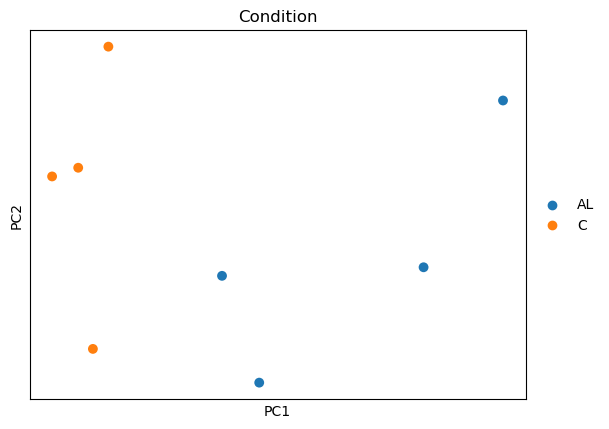

In [19]:
sc.pl.pca(dds, color = 'Condition', size = 200)

In [20]:
dds

AnnData object with n_obs × n_vars = 8 × 34162
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [21]:
stat_res = DeseqStats(dds, inference=inference, contrast = ('Condition','AL','C'))

In [22]:
stat_res.summary()

Running Wald tests...
... done in 25.18 seconds.



Log2 fold change & Wald test p-value: Condition AL vs C
              baseMean  log2FoldChange     lfcSE      stat    pvalue  padj
Geneid                                                                    
LOC100808170  0.768598        2.312781  1.490565  1.551613  0.120755   NaN
LOC102661143  1.500996       -1.789696  1.179358 -1.517517  0.129136   NaN
LOC100781438  2.594930       -0.458289  0.713220 -0.642563  0.520507   NaN
LOC100788220  2.270216        0.166092  0.763406  0.217567  0.827766   NaN
LOC100779643  4.542803       -0.010108  0.687033 -0.014713  0.988262   NaN
...                ...             ...       ...       ...       ...   ...
I638_mgp018   1.157691        0.076330  1.242033  0.061456  0.950996   NaN
I638_mgp014   0.102229        0.655149  3.878810  0.168905  0.865872   NaN
I638_mgp009   0.579427       -0.574228  1.426791 -0.402461  0.687345   NaN
I638_mgp008   0.106484       -0.788037  2.069613 -0.380765  0.703377   NaN
I638_mgp003   0.209485       -0.788036  2.15

In [23]:
res = stat_res.results_df
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
LOC100808170,0.768598,2.312781,1.490565,1.551613,0.120755,NaN
LOC102661143,1.500996,-1.789696,1.179358,-1.517517,0.129136,NaN
LOC100781438,2.594930,-0.458289,0.713220,-0.642563,0.520507,NaN
LOC100788220,2.270216,0.166092,0.763406,0.217567,0.827766,NaN
LOC100779643,4.542803,-0.010108,0.687033,-0.014713,0.988262,NaN
...,...,...,...,...,...,...
I638_mgp018,1.157691,0.076330,1.242033,0.061456,0.950996,NaN
I638_mgp014,0.102229,0.655149,3.878810,0.168905,0.865872,NaN
I638_mgp009,0.579427,-0.574228,1.426791,-0.402461,0.687345,NaN


In [24]:
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]

In [25]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
LOC100788024,7.871938,3.114920,0.687079,4.533572,5.799458e-06,0.000718
LOC100802504,16.462898,-1.246989,0.367592,-3.392319,6.930363e-04,0.024601
MYB158,72.978168,-0.813530,0.225871,-3.601748,3.160841e-04,0.014046
LOC100819571,4.814363,2.851404,0.779087,3.659928,2.522864e-04,0.011797
LOC100500579,522.120195,2.004426,0.511340,3.919950,8.856723e-05,0.005514
...,...,...,...,...,...,...
GlmaCp003,27.352053,1.339458,0.343807,3.895961,9.781019e-05,0.005962
GlmaCp012,11.679013,2.011730,0.504540,3.987255,6.684223e-05,0.004447
GlmaCp047,15.293309,1.557737,0.382254,4.075136,4.598755e-05,0.003464


In [25]:
#Heatmap
import numpy as np
import seaborn as sns

In [26]:
dds

AnnData object with n_obs × n_vars = 8 × 34162
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [27]:
dds.layers['normed_counts']

array([[0.91056704, 1.82113409, 3.64226817, ..., 0.91056704, 0.        ,
        0.        ],
       [0.        , 2.95115179, 2.21336384, ..., 0.73778795, 0.        ,
        0.        ],
       [0.        , 5.02764314, 1.67588105, ..., 0.        , 0.        ,
        1.67588105],
       ...,
       [1.0675924 , 0.        , 3.20277719, ..., 2.1351848 , 0.        ,
        0.        ],
       [2.45349258, 1.63566172, 2.45349258, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.59516826, ..., 0.        , 0.        ,
        0.        ]])

In [28]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

In [29]:
dds.layers['log1p']

array([[0.64740008, 1.03713896, 1.53520308, ..., 0.64740008, 0.        ,
        0.        ],
       [0.        , 1.37400713, 1.16731831, ..., 0.55261301, 0.        ,
        0.        ],
       [0.        , 1.79635608, 0.98427869, ..., 0.        , 0.        ,
        0.98427869],
       ...,
       [0.72638484, 0.        , 1.43574554, ..., 1.14268812, 0.        ,
        0.        ],
       [1.23938606, 0.96913428, 1.23938606, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.95365135, ..., 0.        , 0.        ,
        0.        ]])

In [30]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
LOC100788024,7.871938,3.114920,0.687079,4.533572,5.799458e-06,0.000718
LOC100802504,16.462898,-1.246989,0.367592,-3.392319,6.930363e-04,0.024601
MYB158,72.978168,-0.813530,0.225871,-3.601748,3.160841e-04,0.014046
LOC100819571,4.814363,2.851404,0.779087,3.659928,2.522864e-04,0.011797
LOC100500579,522.120195,2.004426,0.511340,3.919950,8.856723e-05,0.005514
...,...,...,...,...,...,...
GlmaCp003,27.352053,1.339458,0.343807,3.895961,9.781019e-05,0.005962
GlmaCp012,11.679013,2.011730,0.504540,3.987255,6.684223e-05,0.004447
GlmaCp047,15.293309,1.557737,0.382254,4.075136,4.598755e-05,0.003464


In [31]:
dds_sigs = dds[:, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 8 × 441
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [32]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)

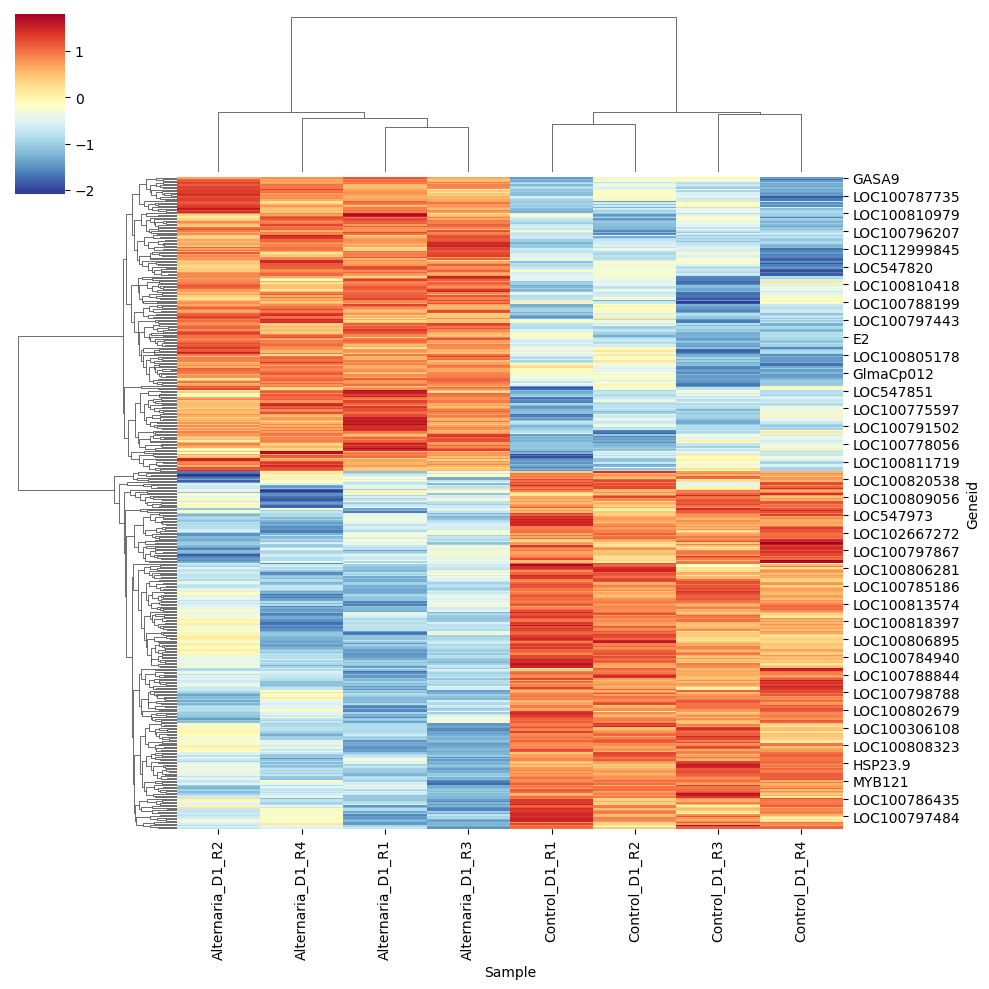

In [33]:
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')

In [ ]:
#Volcano

In [34]:
from bioinfokit import analys, visuz

In [35]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
LOC100788024,7.871938,3.114920,0.687079,4.533572,5.799458e-06,0.000718
LOC100802504,16.462898,-1.246989,0.367592,-3.392319,6.930363e-04,0.024601
MYB158,72.978168,-0.813530,0.225871,-3.601748,3.160841e-04,0.014046
LOC100819571,4.814363,2.851404,0.779087,3.659928,2.522864e-04,0.011797
LOC100500579,522.120195,2.004426,0.511340,3.919950,8.856723e-05,0.005514
...,...,...,...,...,...,...
GlmaCp003,27.352053,1.339458,0.343807,3.895961,9.781019e-05,0.005962
GlmaCp012,11.679013,2.011730,0.504540,3.987255,6.684223e-05,0.004447
GlmaCp047,15.293309,1.557737,0.382254,4.075136,4.598755e-05,0.003464


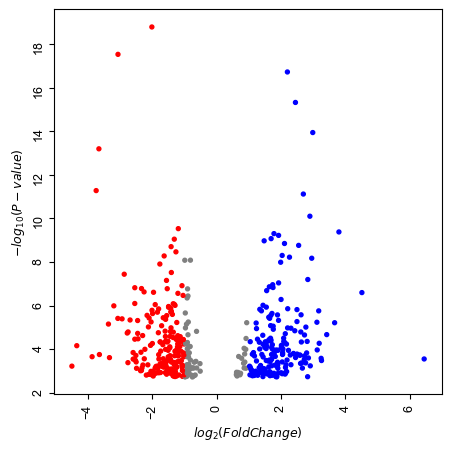

In [37]:
visuz.GeneExpression.volcano(df=sigs, lfc='log2FoldChange', pv='pvalue',
                             color=('blue','grey','red'), 
                             show=True)

In [26]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
LOC100788024,7.871938,3.114920,0.687079,4.533572,5.799458e-06,0.000718
LOC100802504,16.462898,-1.246989,0.367592,-3.392319,6.930363e-04,0.024601
MYB158,72.978168,-0.813530,0.225871,-3.601748,3.160841e-04,0.014046
LOC100819571,4.814363,2.851404,0.779087,3.659928,2.522864e-04,0.011797
LOC100500579,522.120195,2.004426,0.511340,3.919950,8.856723e-05,0.005514
...,...,...,...,...,...,...
GlmaCp003,27.352053,1.339458,0.343807,3.895961,9.781019e-05,0.005962
GlmaCp012,11.679013,2.011730,0.504540,3.987255,6.684223e-05,0.004447
GlmaCp047,15.293309,1.557737,0.382254,4.075136,4.598755e-05,0.003464


In [28]:
sigs.to_csv('expressed_gene_1dpi.csv')